In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import load_wine

In [3]:
wine=load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
features=pd.DataFrame(wine.data,columns=wine.feature_names)
target=pd.DataFrame(wine.target,columns=['TARGET'])
df=pd.concat([features,target],axis=1)

In [6]:
correlation=df.corr('pearson')
correlation['TARGET'].sort_values()

flavanoids                     -0.847498
od280/od315_of_diluted_wines   -0.788230
total_phenols                  -0.719163
proline                        -0.633717
hue                            -0.617369
proanthocyanins                -0.499130
alcohol                        -0.328222
magnesium                      -0.209179
ash                            -0.049643
color_intensity                 0.265668
malic_acid                      0.437776
nonflavanoid_phenols            0.489109
alcalinity_of_ash               0.517859
TARGET                          1.000000
Name: TARGET, dtype: float64

In [7]:
X=np.array(df['flavanoids'])
y=np.array(df['TARGET'])

In [8]:
X=X.reshape(-1,1)

In [9]:
scaler=MinMaxScaler()

In [10]:
x=scaler.fit_transform(X)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
regressor=LogisticRegression(multi_class='ovr')

In [13]:
regressor.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_pred=regressor.predict(x_test)

In [15]:
y_pred

array([2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1])

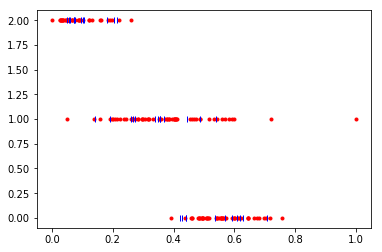

In [16]:
plt.plot(x_train,y_train,'r.',
         x_test,y_test,'b|')

In [17]:
cm=confusion_matrix(y_test,y_pred)

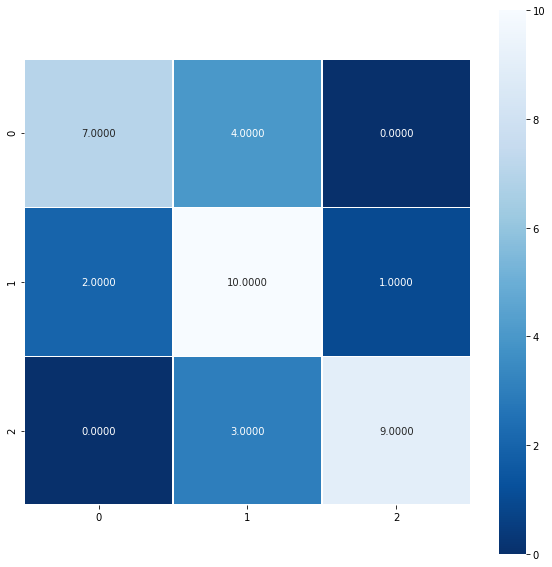

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.4f',linewidths=.5,square=True,cmap='Blues_r')

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7222222222222222


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.59      0.77      0.67        13
           2       0.90      0.75      0.82        12

   micro avg       0.72      0.72      0.72        36
   macro avg       0.76      0.72      0.73        36
weighted avg       0.75      0.72      0.73        36



In [26]:
#f1-score=2*precision*recall/(precision+recall)

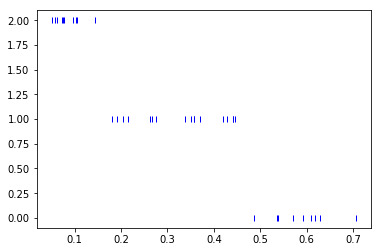

In [21]:
plt.plot(x_test,y_pred,'b|')